In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import re
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup

In [2]:
os.chdir(r"C:\Users\Vaibhav Kumar\Downloads\Emotion detection")

In [3]:
train=pd.read_csv("train.txt", sep=";", header=None, names=["Text","Emotion"])

In [4]:
test=pd.read_csv("val.txt", sep=";", header=None, names=["Text","Emotion"])

In [5]:
train.shape

(16000, 2)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     16000 non-null  object
 1   Emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [7]:
train.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [8]:
test.shape

(2000, 2)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     2000 non-null   object
 1   Emotion  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [10]:
train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [11]:
test.head()

,Text,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


## Preprocessing Data

In [12]:
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text 

In [13]:
from nltk.corpus import stopwords

In [14]:
stopword=set(stopwords.words("english"))

In [15]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(review):
    review = re.sub(r"http\S+", "URLs", review)         #  website links
    review = BeautifulSoup(review, 'lxml').get_text()   #  html tags
    review = decontract(review)                         # decontracting
    review = re.sub("\S*\d\S*", "", review).strip()     # removing words with numeric digits
    review = re.sub('[^A-Za-z]+', ' ', review)          # removing non-word characters
    review = review.lower()                             
    review = [word for word in review.split(" ") if not word in stopword] # removing stop words
    review = [lemmatizer.lemmatize(token, "v") for token in review] #Lemmatization
    review = [word for word in review if len(word)>=3 ]  
    review = " ".join(review)
    review.strip()
    return review


In [16]:
train["Texts"]= train["Text"].apply(lambda x : preprocess_text(x))

In [17]:
test["Texts"]= test["Text"].apply(lambda x : preprocess_text(x))

In [18]:
train.isnull().sum()

Text       0
Emotion    0
Texts      0
dtype: int64

In [19]:
test.isnull().sum()

Text       0
Emotion    0
Texts      0
dtype: int64

In [20]:
train.head()

,Text,Emotion,Texts
0,i didnt feel humiliated,sadness,didnt feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,feel hopeless damn hopeful around someone care...
2,im grabbing a minute to post i feel greedy wrong,anger,grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalgic fireplace know still property
4,i am feeling grouchy,anger,feel grouchy


## EDA

In [21]:
train["Emotion"].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

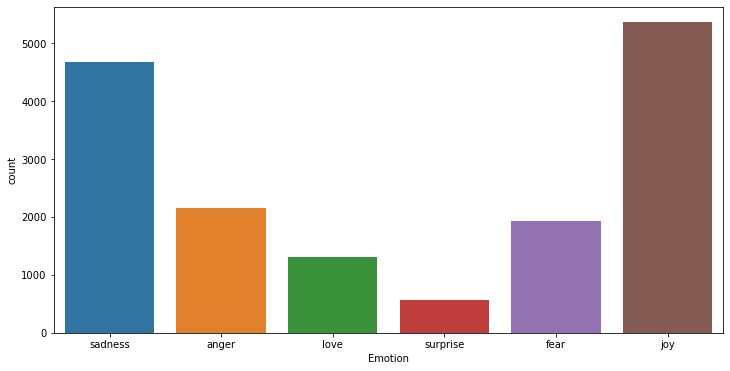

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(data=train, x=train["Emotion"])
plt.show()

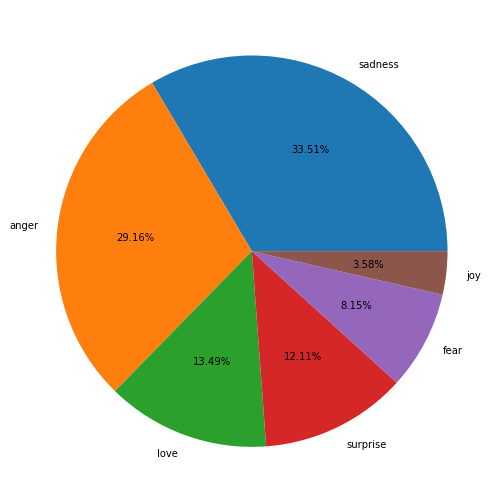

In [23]:
plt.figure(figsize=(18,9))
plt.pie(train["Emotion"].value_counts(), labels=train["Emotion"].unique(), autopct="%0.2f%%")
plt.show()

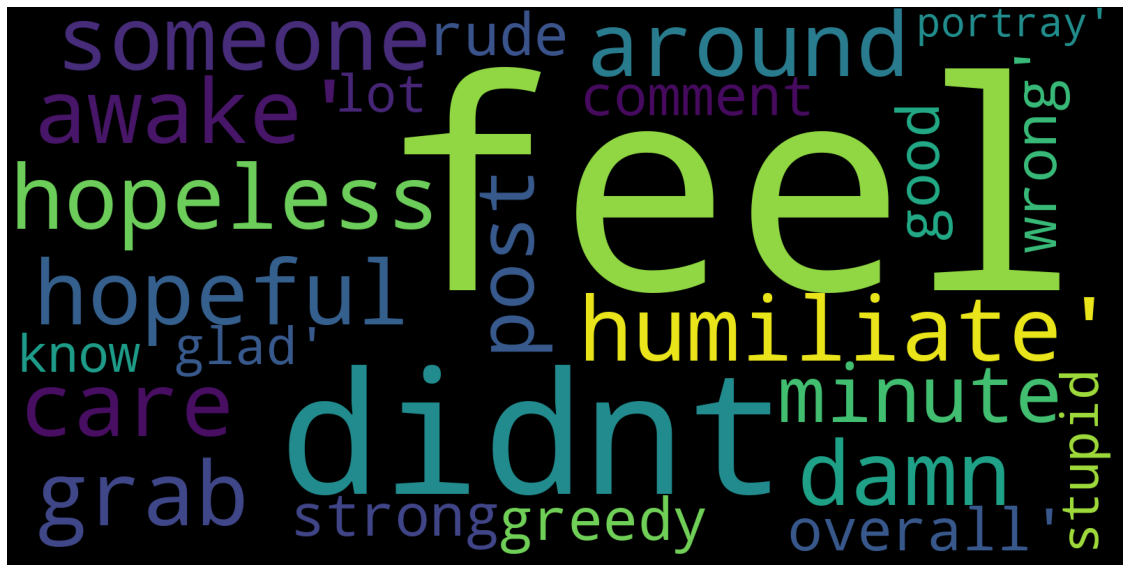

In [24]:

from wordcloud import WordCloud

text = train['Texts'].values 
wordcloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(str(text))
plt.figure(figsize = (20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

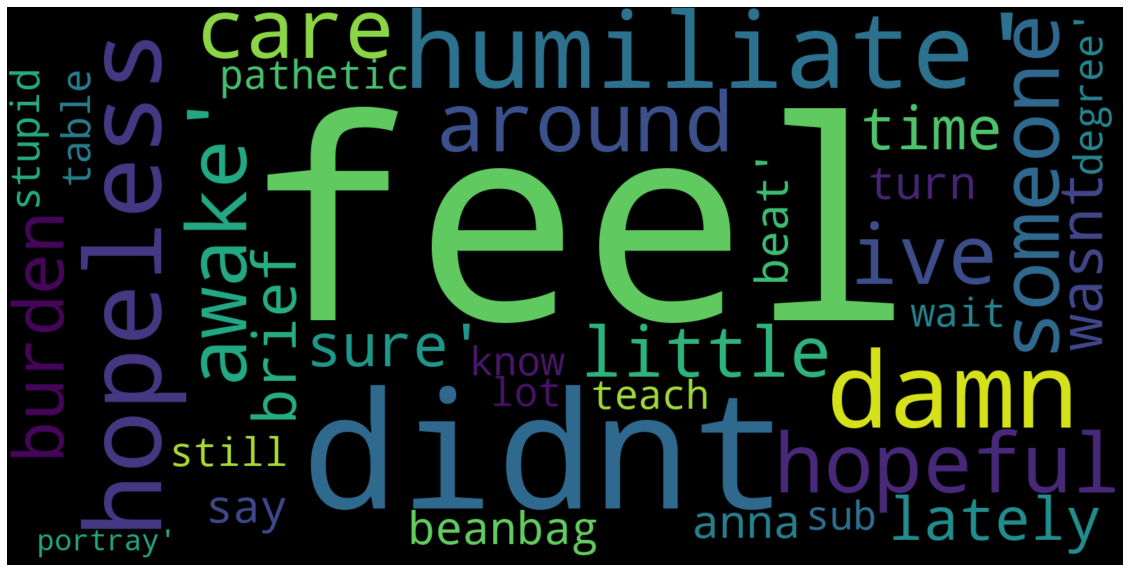

In [25]:
df_pos=train[train['Emotion']=="sadness"]
text = df_pos['Texts'].values 

wordcloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(str(text))
plt.figure(figsize = (20,20))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

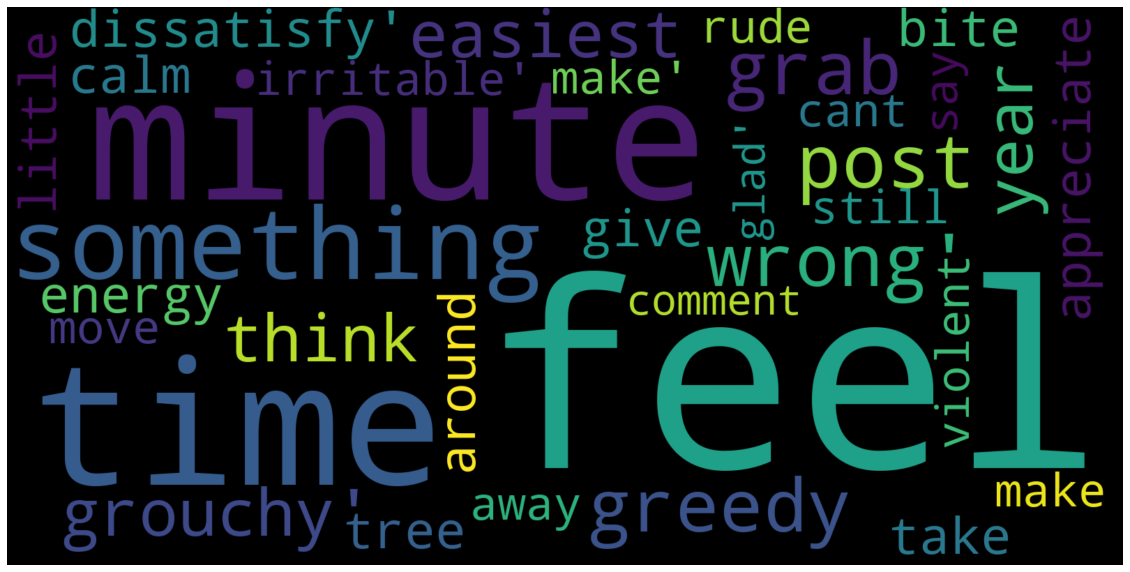

In [26]:
df_pos=train[train['Emotion']=="anger"]
text = df_pos['Texts'].values 

wordcloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(str(text))
plt.figure(figsize = (20,20))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

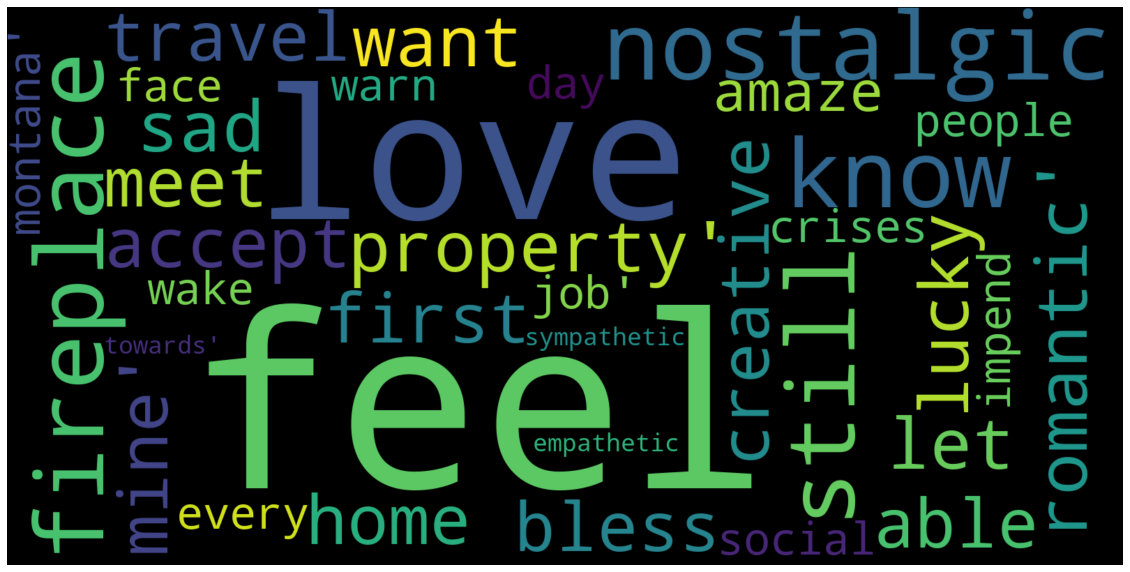

In [27]:
df_pos=train[train['Emotion']=="love"]
text = df_pos['Texts'].values 

wordcloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(str(text))
plt.figure(figsize = (20,20))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

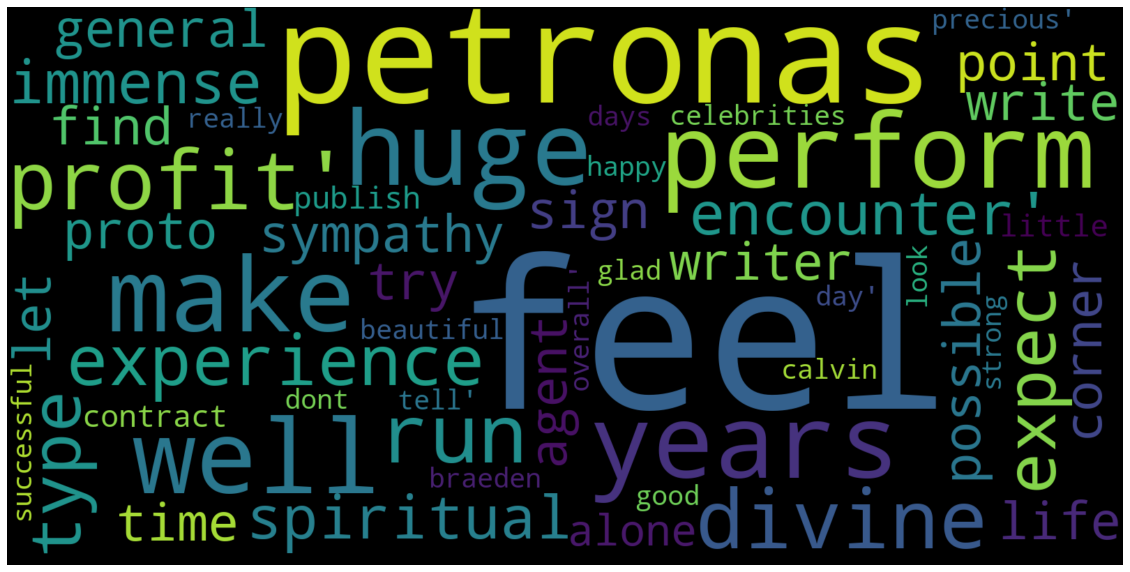

In [28]:
df_pos=train[train['Emotion']=="joy"]
text = df_pos['Texts'].values 

wordcloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(str(text))
plt.figure(figsize = (20,20))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

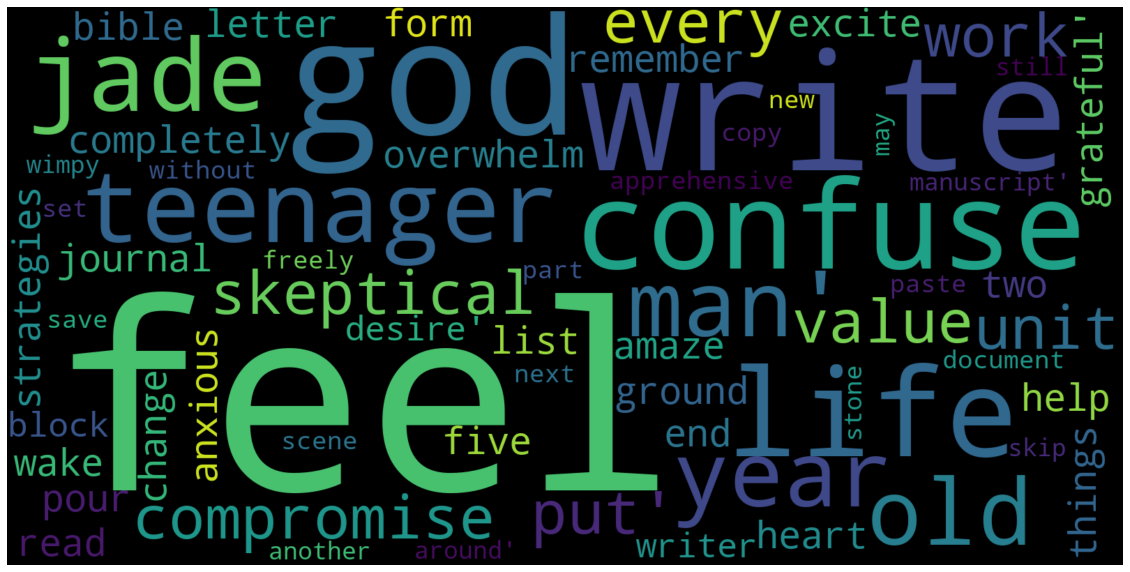

In [29]:
df_pos=train[train['Emotion']=="fear"]
text = df_pos['Texts'].values 

wordcloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(str(text))
plt.figure(figsize = (20,20))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

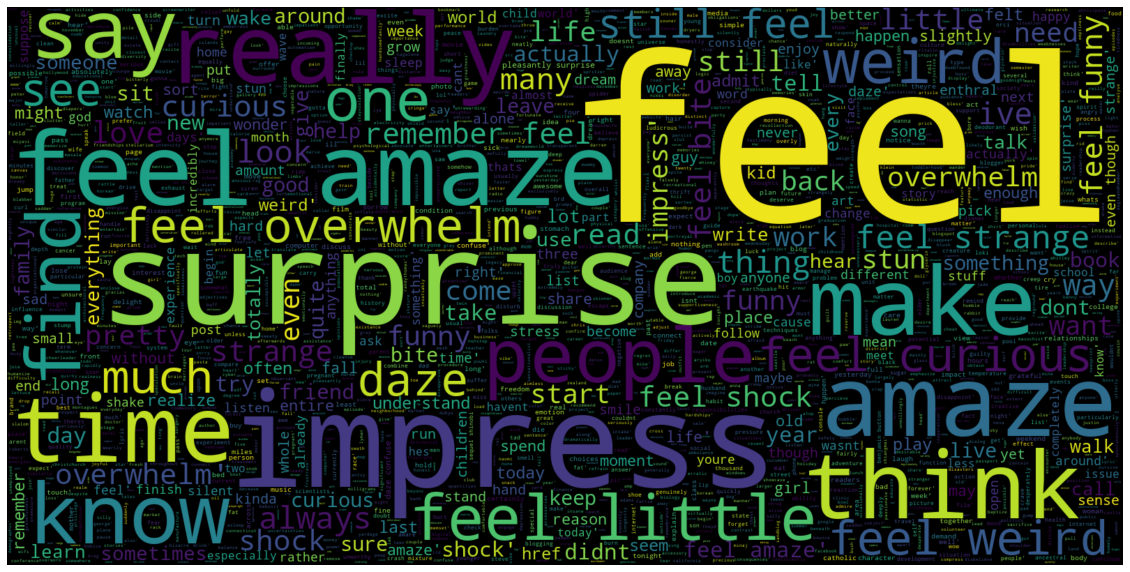

In [30]:
df_pos=train[train['Emotion']=="surprise"]
text = df_pos['Texts'].values 

wordcloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(str(text))
plt.figure(figsize = (20,20))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

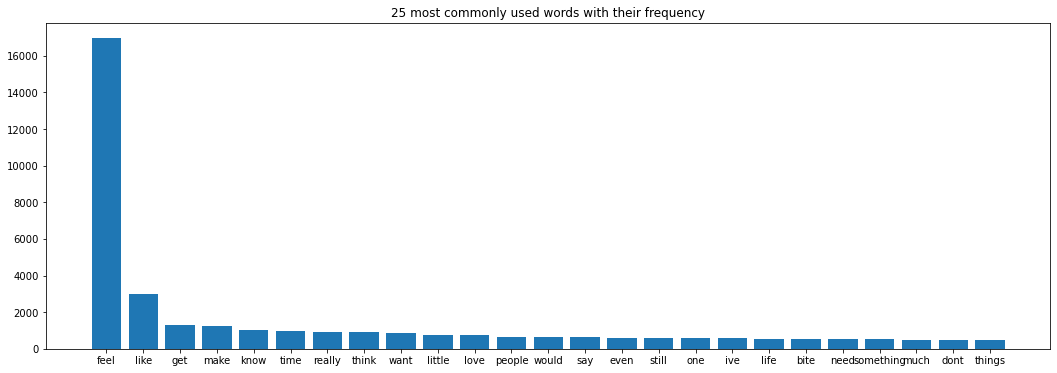

In [31]:
from collections import Counter
count1 = Counter(" ".join(train['Texts']).split()).most_common(25)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in Text", 1 : "count"})


plt.figure(figsize=(18,6))
plt.bar(height=df1["count"],x=df1["words in Text"])
plt.title("25 most commonly used words with their frequency")
plt.show()

In [32]:
train["Emotion"]=train["Emotion"].map({"joy"   :      0,
"sadness" :    1,
"anger"  :     2,
"fear"  :      3,
"love"  :      4,
"surprise" :    5})


test["Emotion"]=test["Emotion"].map({"joy"   :      0,
"sadness" :    1,
"anger"  :     2,
"fear"  :      3,
"love"  :      4,
"surprise" :    5})

## Data split

In [33]:
x_train= train["Texts"]
x_test= test["Texts"]
y_train= train["Emotion"]
y_test= test["Emotion"]

In [34]:
x_train.shape

(16000,)

In [35]:
x_test.shape

(2000,)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vect = CountVectorizer(lowercase=True, stop_words="english", min_df=35, max_df=0.2,ngram_range=(1, 2) )

In [38]:
vect.fit(x_train)

CountVectorizer(max_df=0.2, min_df=35, ngram_range=(1, 2), stop_words='english')

In [39]:
len(vect.get_feature_names())

828

In [40]:
x_train_tf= vect.transform(x_train)


In [41]:
x_train_tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
x_train1= pd.DataFrame(x_train_tf.toarray(), columns=vect.get_feature_names())

In [43]:
x_train1.shape

(16000, 828)

In [44]:
x_test_tf= vect.transform(x_test)
x_test1= pd.DataFrame(x_test_tf.toarray(), columns=vect.get_feature_names())

In [45]:
from xgboost import XGBClassifier
m1=XGBClassifier(learning_rate=0.095,eval_metric="mlogloss")
m1.fit(x_train1, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.095, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

## Evaluation

In [46]:
print("Train Accuracy : ", m1.score(x_train1, y_train))
print("Test Accuracy : ", m1.score(x_test1, y_test))

Train Accuracy :  0.8371875
Test Accuracy :  0.8115


In [47]:
res=pd.DataFrame(m1.predict(x_test1), columns=["res"])
res

,res
0,1
1,1
2,0
3,2
4,0
...,...
1995,1
1996,0
1997,0
1998,4


In [48]:
y_test

0       1
1       1
2       4
3       2
4       0
       ..
1995    1
1996    0
1997    0
1998    0
1999    0
Name: Emotion, Length: 2000, dtype: int64

In [49]:
print(metrics.classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       704
           1       0.91      0.83      0.87       550
           2       0.89      0.73      0.80       275
           3       0.87      0.67      0.76       212
           4       0.78      0.66      0.72       178
           5       0.67      0.77      0.72        81

    accuracy                           0.81      2000
   macro avg       0.81      0.76      0.78      2000
weighted avg       0.82      0.81      0.81      2000



## Emotion Detection for new Sentences

In [50]:
sentence={"i am right handed however i play billiards left handed naturally so me trying to play right handed feels weird"}
new=vect.transform(sentence)
new1=pd.DataFrame(new.toarray(), columns=vect.get_feature_names())
pd.DataFrame(m1.predict(new1))[0].map({0:"joy",
                                       1:"sadness" ,
                                       2:"anger",
                                       3:"fear" ,
                                       4:"love" ,
                                       5:"surprise"})

0    surprise
Name: 0, dtype: object

In [51]:
sentence={"i want each of you to feel my gentle embrace"}
new=vect.transform(sentence)
new1=pd.DataFrame(new.toarray(), columns=vect.get_feature_names())
pd.DataFrame(m1.predict(new1))[0].map({0:"joy",
                                       1:"sadness" ,
                                       2:"anger",
                                       3:"fear" ,
                                       4:"love" ,
                                       5:"surprise"})

0    love
Name: 0, dtype: object

In [52]:
sentence={"i just plain feel envious of the self confidence they had"}
new=vect.transform(sentence)
new1=pd.DataFrame(new.toarray(), columns=vect.get_feature_names())
pd.DataFrame(m1.predict(new1))[0].map({0:"joy",
                                       1:"sadness" ,
                                       2:"anger",
                                       3:"fear" ,
                                       4:"love" ,
                                       5:"surprise"})

0    anger
Name: 0, dtype: object